<html>
            <div style="font-size:7pt">
            This notebook may contain text, code and images generated by artificial intelligence.
            Used model: claude-3-opus-20240229,
            vision model: claude-3-opus-20240229,
            endpoint: None,
            bia-bob version: 0.18.0.
            It is good scientific practice to check the code and results it produces carefully.
            <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a>.
            </div>
            </html>

# HeLa Cells Image Analysis
This notebook processes an immunofluorescence microscopy image of HeLa cells. 
The image shows cell nuclei stained in blue.
The goal is to segment the nuclei objects in the blue channel.

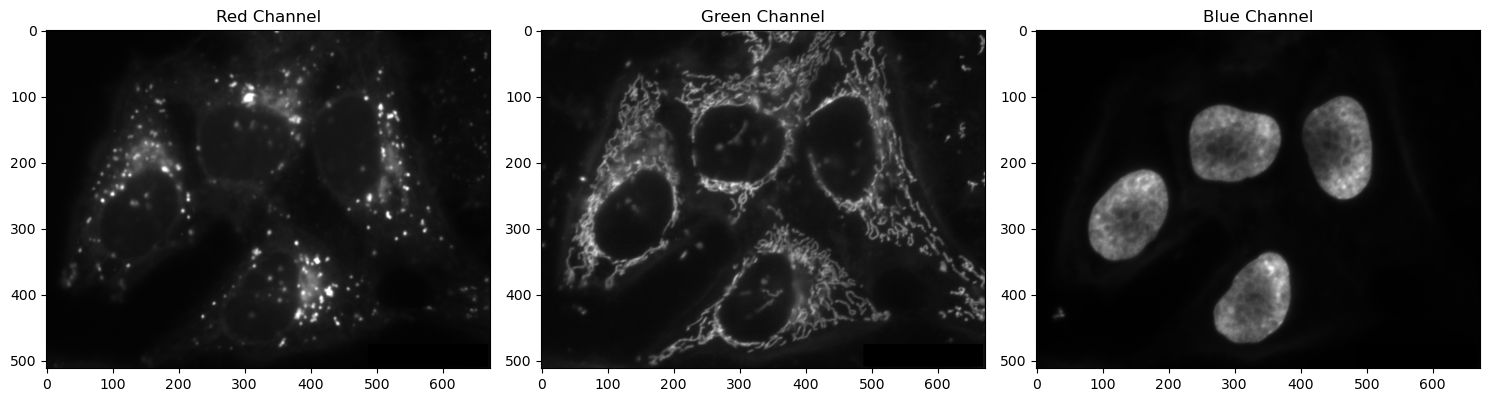

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Read in the image file
image = io.imread('hela-cells-8bit.tif')

# The image has 3 channels: RGB 
# Let's visualize each channel separately
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image[:,:,0], cmap='gray')
ax[0].set_title('Red Channel')
ax[1].imshow(image[:,:,1], cmap='gray') 
ax[1].set_title('Green Channel')
ax[2].imshow(image[:,:,2], cmap='gray')
ax[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

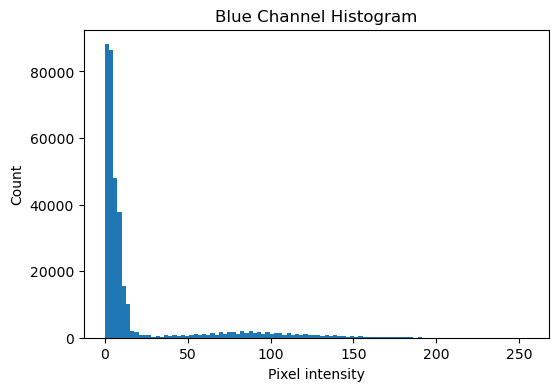

In [2]:
# We want to segment the nuclei in the blue channel
# So let's extract that channel into its own variable
blue = image[:,:,2]

# Plotting the histogram of pixel intensities is useful 
# to determine a threshold for segmentation
plt.figure(figsize=(6,4))
plt.hist(blue.flat, bins=100, range=(0,255))
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count') 
plt.show()

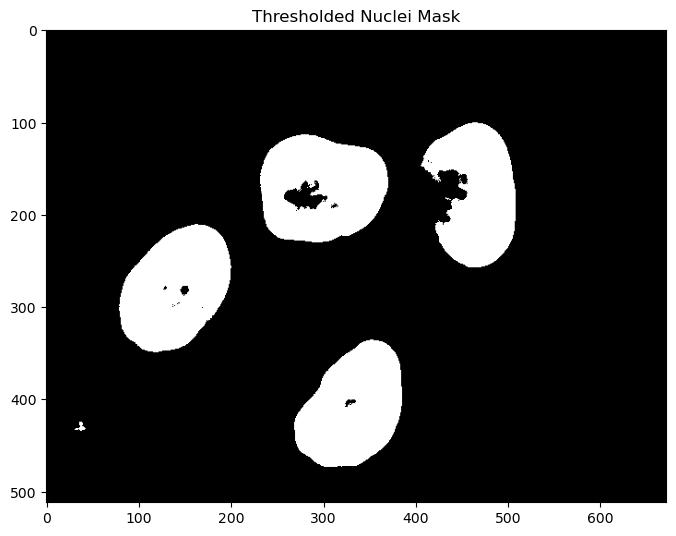

In [3]:
# Based on the histogram, a threshold around 50 seems reasonable
# to separate background from nuclei. Let's try that:
thresh = 50
nuclei_mask = blue > thresh

plt.figure(figsize=(8,8))
plt.imshow(nuclei_mask, cmap='gray')
plt.title('Thresholded Nuclei Mask')
plt.show()

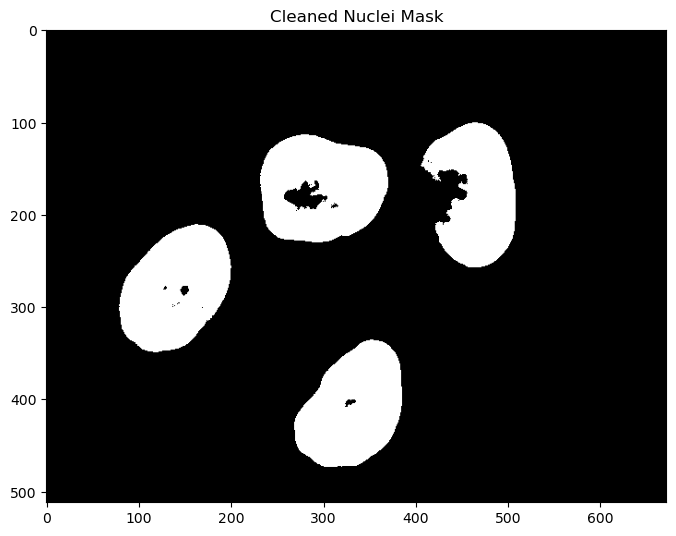

In [4]:
# The thresholding segments the nuclei pretty well!
# But there are still some small noise objects.
# We can remove those with some morphological operations.

from skimage.morphology import remove_small_objects

# Remove objects smaller than 100 pixels
nuclei_mask_cleaned = remove_small_objects(nuclei_mask, min_size=100) 

plt.figure(figsize=(8,8))
plt.imshow(nuclei_mask_cleaned, cmap='gray')
plt.title('Cleaned Nuclei Mask')
plt.show()

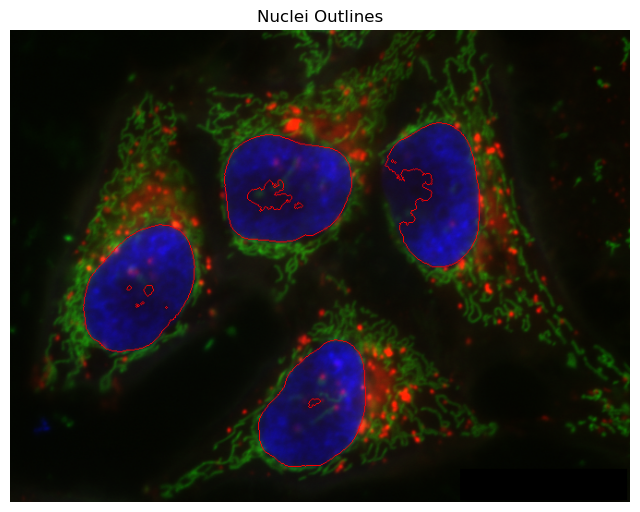

In [5]:
# For visualization, let's outline the detected nuclei on the original image
from skimage.segmentation import find_boundaries

boundaries = find_boundaries(nuclei_mask_cleaned, mode='inner')
image_with_boundaries = image.copy()
image_with_boundaries[boundaries] = [255,0,0]

plt.figure(figsize=(8,8))
plt.imshow(image_with_boundaries)
plt.title('Nuclei Outlines')
plt.axis('off') 
plt.show()

In [6]:
print(f'Total nuclei detected: {nuclei_mask_cleaned.max()}')

Total nuclei detected: True


This notebook does the following:

1. Reads in the "hela-cells-8bit.tif" image file using scikit-image. The image shows HeLa cell nuclei stained in blue.

2. Visualizes each color channel (red, green, blue) separately. This confirms the nuclei are in the blue channel. 

3. Extracts the blue channel into its own variable for further processing.

4. Plots a histogram of pixel intensities in the blue channel. This helps determine an intensity threshold to separate nuclei from background.

5. Applies a threshold of 50 to create a binary mask of the nuclei. Pixels above 50 are considered nuclei.

6. Cleans up the thresholded mask by removing small objects (noise) less than 100 pixels in size using skimage's remove_small_objects.

7. Finds the outlines of the detected nuclei using find_boundaries and overlays them on the original RGB image for visualization.

8. Finally, counts and prints out the total number of nuclei detected.

The key steps are thresholding to create the initial nuclei segmentation, followed by morphological operations to refine the segmentation by removing small noise objects. Scikit-image is used extensively for these image processing tasks.

Let me know if you have any other questions! I'm happy to explain or modify the code further.